- Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

- Loading the dataset

## 1. Dataset Selection and Description
- The dataset used in this analysis is **student_habits_performance.csv**, obtained from a public dataset repository. It contains information on students’ daily habits, lifestyle factors, and academic outcomes.


In [2]:
student = pd.read_csv('student_habits_performance.csv')
student

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


## Problem formulation
- The analytical problem is to predict students’ exam scores based on their daily habits and lifestyle factors. The dependent  variable is Exam Score while the independent variables include study hours per day, attendance percentage,sleep hours, social media usage, Netflix hours, exercise frequency, and mental health rating.

- Inspecting the dataset structure to know the different data types, missing values and etc

In [3]:
student.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

- checking for mising values 

In [4]:
student.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [5]:
student['parental_education_level'].describe()

count             909
unique              3
top       High School
freq              392
Name: parental_education_level, dtype: object

In [6]:
student.describe(include='all')

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,1000,1000.0000,1000,1000.00000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000.000000,909,1000,1000.000000,1000,1000.000000
unique,1000,NaN,3,NaN,NaN,NaN,2,NaN,NaN,3,NaN,3,3,NaN,2,NaN
top,S1000,NaN,Female,NaN,NaN,NaN,No,NaN,NaN,Fair,NaN,High School,Good,NaN,No,NaN
freq,1,NaN,481,NaN,NaN,NaN,785,NaN,NaN,437,NaN,392,447,NaN,682,NaN
mean,NaN,20.4980,NaN,3.55010,2.505500,1.819700,NaN,84.131700,6.470100,NaN,3.042000,NaN,NaN,5.438000,NaN,69.601500
std,NaN,2.3081,NaN,1.46889,1.172422,1.075118,NaN,9.399246,1.226377,NaN,2.025423,NaN,NaN,2.847501,NaN,16.888564
min,NaN,17.0000,NaN,0.00000,0.000000,0.000000,NaN,56.000000,3.200000,NaN,0.000000,NaN,NaN,1.000000,NaN,18.400000
25%,NaN,18.7500,NaN,2.60000,1.700000,1.000000,NaN,78.000000,5.600000,NaN,1.000000,NaN,NaN,3.000000,NaN,58.475000
50%,NaN,20.0000,NaN,3.50000,2.500000,1.800000,NaN,84.400000,6.500000,NaN,3.000000,NaN,NaN,5.000000,NaN,70.500000
75%,NaN,23.0000,NaN,4.50000,3.300000,2.525000,NaN,91.025000,7.300000,NaN,5.000000,NaN,NaN,8.000000,NaN,81.325000


In [7]:
cont_data =student.select_dtypes(include=['int64','float64'])
cont_data

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4
...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,77.0,7.5,2,6,76.1
996,17,2.9,1.0,2.4,86.0,6.8,1,6,65.9
997,20,3.0,2.6,1.3,61.9,6.5,5,9,64.4
998,24,5.4,4.1,1.1,100.0,7.6,0,1,69.7


In [8]:
cat_data = student.select_dtypes(include=['object'])
cat_data

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
0,S1000,Female,No,Fair,Master,Average,Yes
1,S1001,Female,No,Good,High School,Average,No
2,S1002,Male,No,Poor,High School,Poor,No
3,S1003,Female,No,Poor,Master,Good,Yes
4,S1004,Female,No,Fair,Master,Good,No
...,...,...,...,...,...,...,...
995,S1995,Female,No,Fair,High School,Good,Yes
996,S1996,Female,Yes,Poor,High School,Average,Yes
997,S1997,Male,No,Good,Bachelor,Good,Yes
998,S1998,Male,Yes,Fair,Bachelor,Average,No


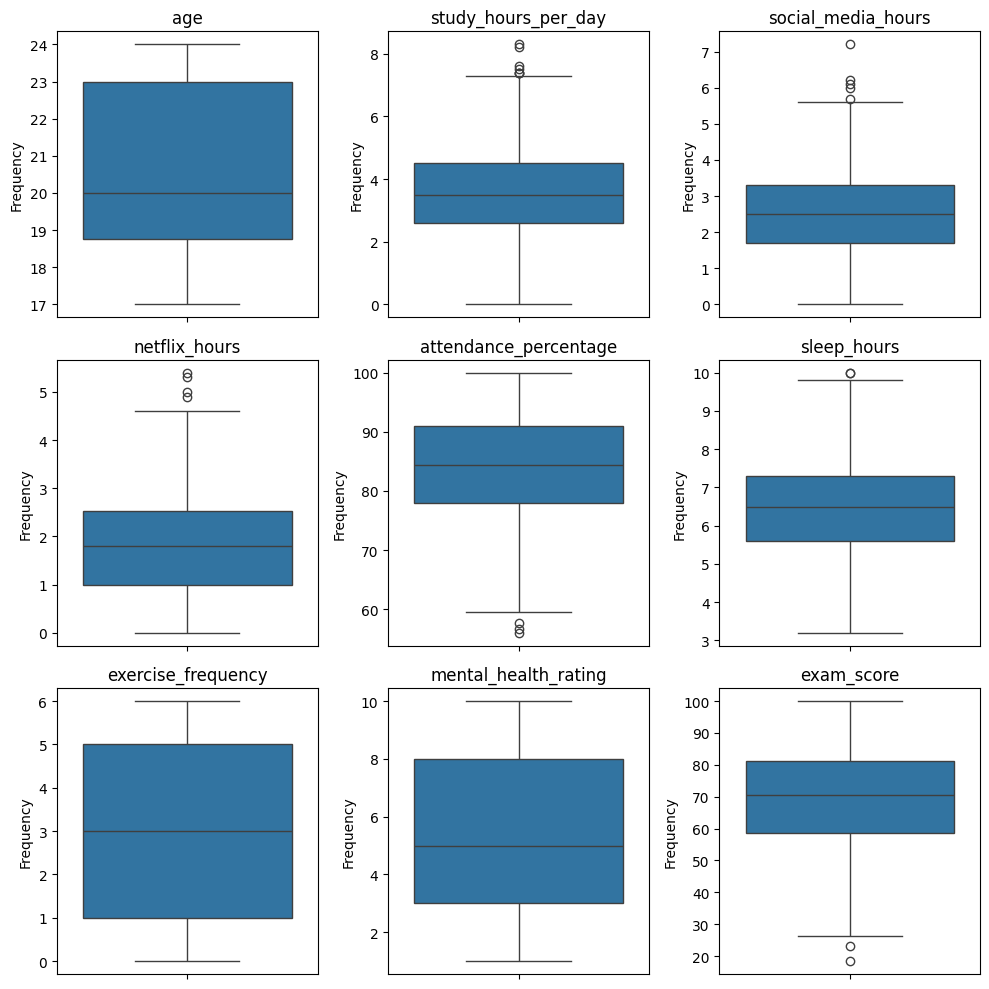

In [9]:
plt.figure(figsize=(10,10))
for i, col in enumerate(cont_data.columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(cont_data[col])
    plt.title(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [10]:
def remove_outliers(columns):
    for column in columns:
        Q1 = cont_data[column].quantile(0.25)
        Q3 = cont_data[column].quantile(0.75)

        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR

        cont_data[column] = np.where(cont_data[column]> upper_bound, upper_bound,cont_data[column])
        cont_data[column] = np.where(cont_data[column]< lower_bound, lower_bound,cont_data[column])

In [11]:
remove_outliers(cont_data)

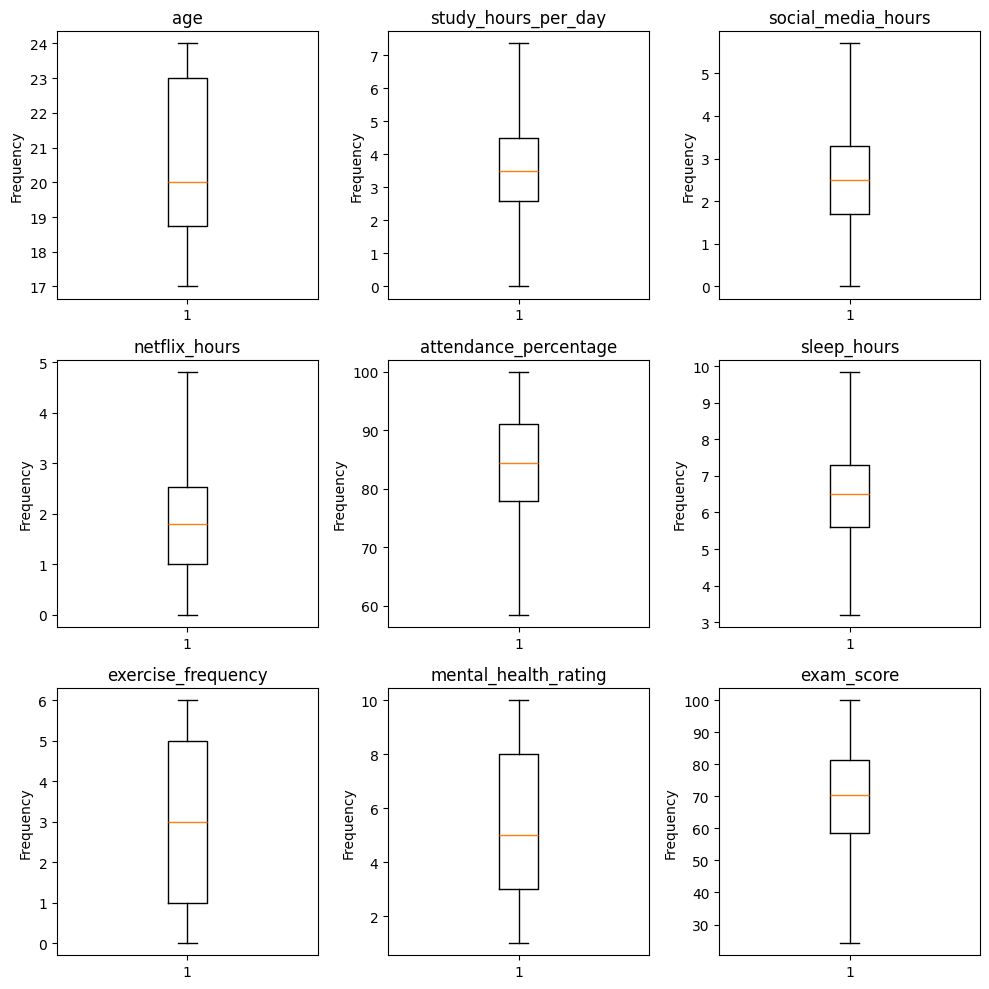

In [12]:
plt.figure(figsize=(10,10))
for i, col in enumerate(cont_data.columns):
    plt.subplot(3,3, i+1)
    plt.boxplot(cont_data[col])
    plt.title(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [13]:
corr_matrix =cont_data.corr()
corr_matrix

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.004070,-0.008159,-0.002324,-0.025712,0.037773,-0.003836,-0.045101,-0.009219
study_hours_per_day,0.004070,1.000000,0.020626,-0.031760,0.026144,-0.027393,-0.029086,-0.004355,0.826451
social_media_hours,-0.008159,0.020626,1.000000,0.009519,0.039704,0.019222,-0.036017,0.001351,-0.166285
netflix_hours,-0.002324,-0.031760,0.009519,1.000000,-0.002025,-0.002429,-0.006839,0.008616,-0.171868
attendance_percentage,-0.025712,0.026144,0.039704,-0.002025,1.000000,0.013504,-0.007850,-0.018766,0.090068
sleep_hours,0.037773,-0.027393,0.019222,-0.002429,0.013504,1.000000,0.019727,-0.006475,0.121353
exercise_frequency,-0.003836,-0.029086,-0.036017,-0.006839,-0.007850,0.019727,1.000000,-0.000242,0.159849
mental_health_rating,-0.045101,-0.004355,0.001351,0.008616,-0.018766,-0.006475,-0.000242,1.000000,0.321621
exam_score,-0.009219,0.826451,-0.166285,-0.171868,0.090068,0.121353,0.159849,0.321621,1.000000


In [14]:
target = student['exam_score']

In [15]:
cont_data.columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')

In [16]:
cont_cols =['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating']

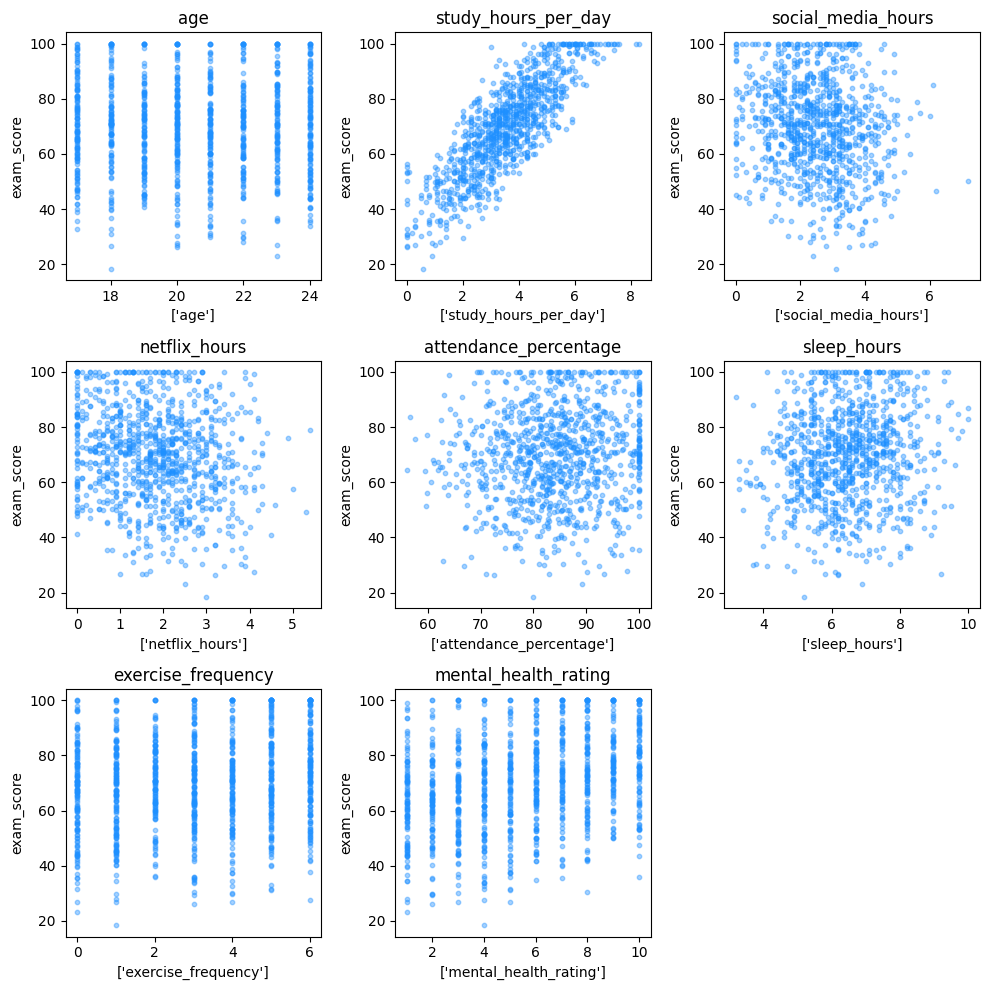

In [17]:
plt.figure(figsize=(10,10))
for i, col in enumerate(cont_cols,1):
    plt.subplot(3,3,i)
    plt.scatter(student[col], student['exam_score'], alpha=0.4, s=10, color='dodgerblue')
    plt.title(col)
    plt.ylabel("exam_score")
    plt.xlabel([col])
plt.tight_layout()
plt.show()

- The above visualization shows the correlation between continous variables and the target variable

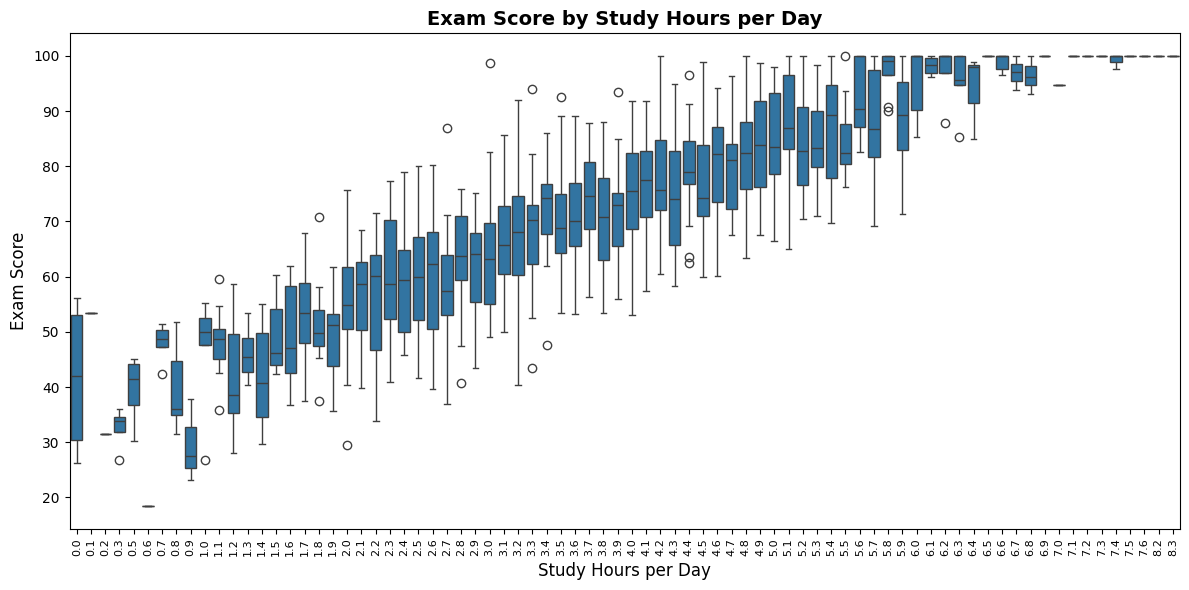

In [18]:
plt.figure(figsize=(12, 6))  # make the figure wider
sns.boxplot(data=student, x='study_hours_per_day', y='exam_score')

plt.title('Exam Score by Study Hours per Day', fontsize=14, fontweight='bold')
plt.xlabel('Study Hours per Day', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)

# improve x-axis readability
plt.xticks(rotation=90, fontsize=8, ha='center')  # rotate more and center align
plt.tight_layout()
plt.show()

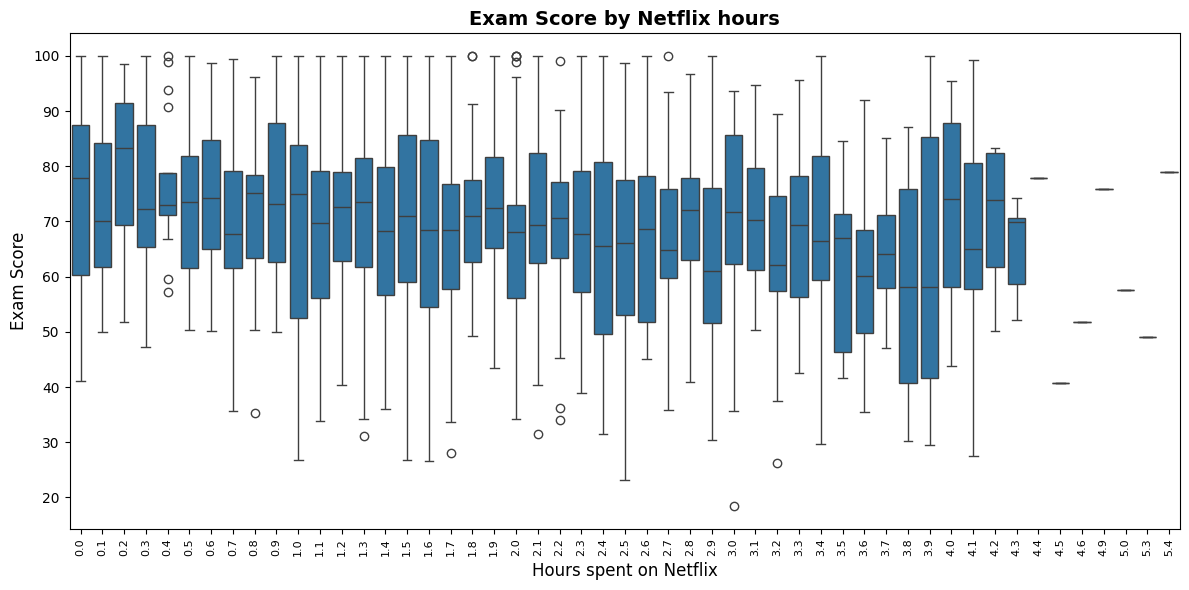

In [19]:
plt.figure(figsize=(12, 6))  # make the figure wider
sns.boxplot(data=student, x='netflix_hours', y='exam_score')

plt.title('Exam Score by Netflix hours', fontsize=14, fontweight='bold')
plt.xlabel('Hours spent on Netflix', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)

# improve x-axis readability
plt.xticks(rotation=90, fontsize=8, ha='center')  # rotate more and center align
plt.tight_layout()
plt.show()

In [20]:
from scipy.stats import pearsonr, spearmanr, f_oneway

def Anova_test(data, var1, var2):
    group_data=[
        group[var1].values for _, group in data.groupby(var2)
    ]
    f_stats, p_value = f_oneway(*group_data)
    if p_value > 0.05:
        print(f"{var1} is not significantly correlated with {var2}")
    else:
        print(f"{var1} is significantly correlated with {var2}")
    print(p_value)
    print(f_stats)


In [21]:
Anova_test(student, 'exam_score', 'parental_education_level')

exam_score is not significantly correlated with parental_education_level
0.3901114487005922
0.9423015153542325


In [22]:
Anova_test(student, 'exam_score', 'study_hours_per_day')

exam_score is significantly correlated with study_hours_per_day
3.672444928437512e-195
28.819680219449342


## Regression Models

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error


In [24]:
student.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [25]:
cont_data.columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')

In [26]:
X = student[['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating']]
y = target

- splitting the dataset into train and test sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape

((800, 8), (200, 8))

# Linear Regression

In [28]:
x_linear = X[['study_hours_per_day']]
y = target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x_linear,y,test_size=0.2, random_state=42)

In [30]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

- Making predictions

In [31]:
y_pred = linear_reg.predict(X_test)

- Evaluating the model

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}, \nMSE: {mse:.3f}, \nR^2: {r2:.3f}")

MAE: 7.423, 
MSE: 85.159, 
R^2: 0.668


- visualizing the linear regression and the performance of the model

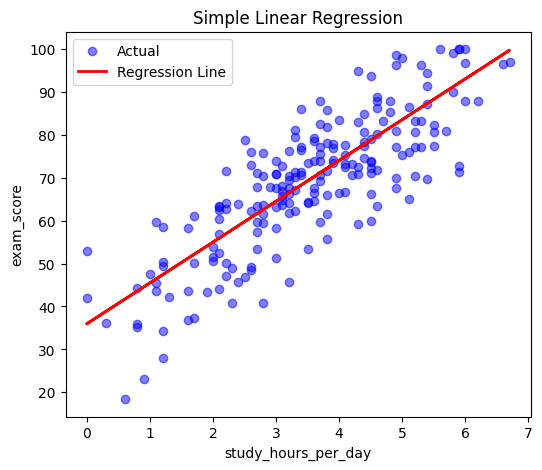

In [33]:
plt.figure(figsize=(6,5))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("study_hours_per_day")
plt.ylabel("exam_score")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [34]:
X.corr()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating
age,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101
study_hours_per_day,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768
social_media_hours,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496
netflix_hours,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034
attendance_percentage,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745
sleep_hours,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508
exercise_frequency,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242
mental_health_rating,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000


#  Multiple Linear regression

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
linear_reg_multi = LinearRegression()
linear_reg_multi.fit(X_train_scaled, y_train)

## making predictions
y_pred_multi = linear_reg_multi.predict(X_test_scaled)

In [37]:
### model evaluation
mae_m = mean_absolute_error(y_test, y_pred_multi)
mse_m = mean_squared_error(y_test, y_pred_multi)
r2_m = r2_score(y_test, y_pred_multi)

print(f"\nMAE: {mae_m:.3f},\nMSE: {mse_m:.3f},\nR²: {r2_m:.3f}")


MAE: 4.130,
MSE: 25.921,
R²: 0.899


- Visualization of the multiple regression and the model performance

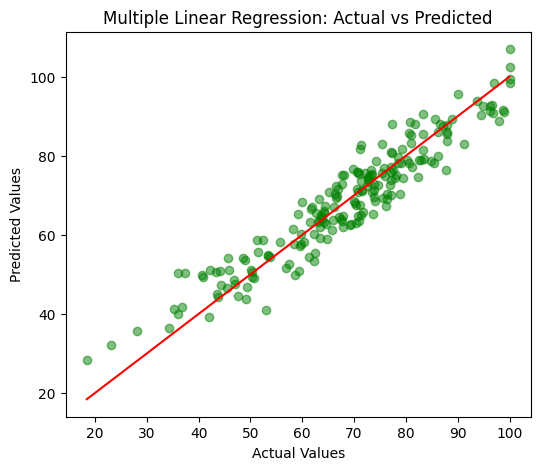

In [38]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_multi, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.show()

- Showing how each coefficient affects the exam score 

In [39]:
coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": linear_reg_multi.coef_
}).sort_values("Coefficient", ascending=False)

coeffs

,Feature,Coefficient
1,study_hours_per_day,14.147789
7,mental_health_rating,5.561952
6,exercise_frequency,2.648078
5,sleep_hours,2.438113
4,attendance_percentage,1.372740
0,age,0.120940
3,netflix_hours,-2.529008
2,social_media_hours,-3.153510


# Decision Tree Regressor

In [40]:
tree = DecisionTreeRegressor(max_depth=6, random_state=42)
tree.fit(X_train, y_train)
y_pred_tr = tree.predict(X_test)
mae_tr = mean_absolute_error(y_test, y_pred_tr)
mse_tr = mean_squared_error(y_test, y_pred_tr)
rmse_tr = root_mean_squared_error(y_test, y_pred_tr)
r2_tr = r2_score(y_test, y_pred_tr)
print(f'MAE: {mae_tr:.4f} \nMSE: {mse_tr:.4f} \nRMSE: {rmse_tr:.4f} \nR2: {r2_tr:.2f}') 

MAE: 7.0073 
MSE: 79.8416 
RMSE: 8.9354 
R2: 0.69


In [41]:
feature_names = X.columns

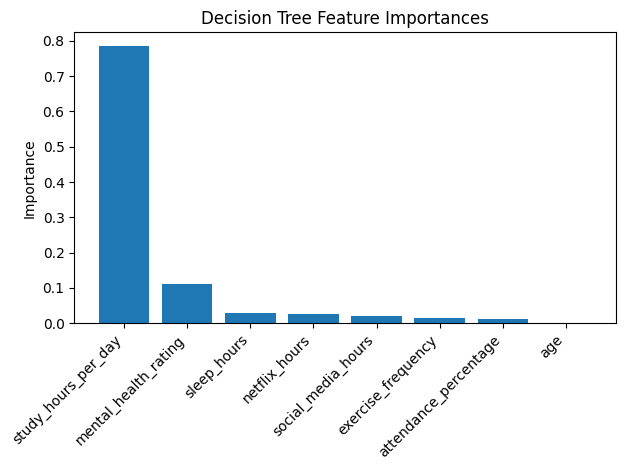

In [42]:
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45, ha='right')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importances')
plt.tight_layout()
plt.show()